In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
PATH = "./measurements/full-x4"

In [17]:
fechas=['2021-11-19_17-55-37','2021-11-27_16-16-53','2021-11-27_18-22-19']
data=[]

for i in fechas:
    data.append(pd.read_csv(f"{PATH}/{i}/figuras/area_{i}.csv"))

In [18]:
data=pd.concat(data)

In [19]:
data

,# nro,Area1,Area2,Area3,Area4
0,1.0,861577.5,680407.0,999943.0,373595.5
1,2.0,777764.5,680266.5,1013391.5,417690.5
2,3.0,661939.0,633581.0,1001593.5,437191.5
3,4.0,494296.5,354747.5,593983.0,690197.0
4,5.0,1007897.0,743866.5,1160173.0,766309.0
5,6.0,1090384.5,575843.0,1297863.0,734609.0
6,7.0,1034822.5,574966.0,1721639.0,730399.0
7,8.0,983064.0,542898.5,2161321.0,703354.5
8,9.0,933170.5,481938.5,2209964.0,678543.5
9,10.0,854629.0,480621.5,1924268.0,693415.0


In [31]:
dt=1/4
x=np.arange(0,len(data["# nro"])/4,dt) 

In [21]:
#AREAS
#area1=[]
#area2=[]
#area3=[]
#area4=[]

#for i in range(len(fechas)):
#    area1.append(np.array(data['Area1']))
#    area2.append(np.array(data['Area2']))
#    area3.append(np.array(data['Area3']))
#    area4.append(np.array(data['Area4']))

#area1=np.concatenate(area1)
#area2=np.concatenate(area2)
#area3=np.concatenate(area3)
#area4=np.concatenate(area4)


area1=np.array([data['Area1']])
area2=np.array([data['Area2']])
area3=np.array([data['Area3']])
area4=np.array([data['Area4']])

In [44]:
data['Area1']

0      861577.5
1      777764.5
2      661939.0
3      494296.5
4     1007897.0
5     1090384.5
6     1034822.5
7      983064.0
8      933170.5
9      854629.0
10     785312.0
11    1071947.5
12    1554731.0
13    1216367.5
14    1044044.0
15    2352027.0
16    1931397.0
17    1302351.5
18    1025788.5
19    1186077.0
20     836218.5
21     679337.5
22     626335.5
23    1246787.0
24    3043327.5
25    2556294.5
26    1669271.5
27    1172498.5
28     772999.0
29     647505.0
30    6847099.0
0     1174139.5
0     1874370.0
1     1255871.5
2      900422.5
3      690169.0
Name: Area1, dtype: float64

In [30]:
len(data["# nro"])/4

9.0

La fórmula es 
g= $\frac{F CT 44 g/mol}{22414 . 10^6 0.001L/mol}$

Con F el flujo (1.5L/min), CT el área bajo la curva en MINUTOS, como lo tenemos en segundos:

g= $\frac{F* CT/60 * 44 g/mol}{22414 . 10^6 0.001L/mol}$

In [23]:
F = 1.5
den = 22414 * 0.001 * 10 ** 6

def gramos(x): #meter el área
    return F * x * 44 / (den*60)


In [41]:
gramos1=np.array(gramos(area1))*6
gramos2=np.array(gramos(area2))*6
gramos3=np.array(gramos(area3))*6
gramos4=np.array(gramos(area4))*6

In [50]:
#Gramos acumulados, suponiendo que ese valor se produjo durante 6h
gramos1_ac=np.add.accumulate(gramos1[0])
gramos2_ac=np.add.accumulate(gramos2[0])
gramos3_ac=np.add.accumulate(gramos3[0])
gramos4_ac=np.add.accumulate(gramos4[0])

Cada área tomada fue de 25 minutos, por tanto, hacemos regla de 3 simples para comparar con el de titulacion (5.5h)

25 min ---- area

5.5h=330min ----

se debe multiplicar al eje Y por 330/25=13.2 ¿¿¿???

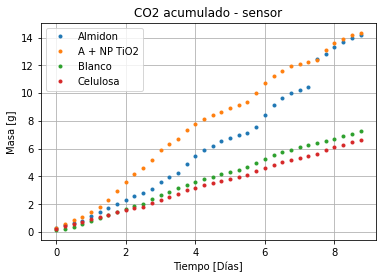

In [52]:
plt.plot(x,gramos1_ac,'.',label='Almidon')
plt.plot(x,gramos3_ac,'.',label='A + NP TiO2')
plt.plot(x,gramos4_ac,'.',label='Blanco')
plt.plot(x,gramos2_ac,'.',label='Celulosa')
plt.legend()
plt.title('CO2 acumulado - sensor')
plt.xlabel('Tiempo [Días]')
plt.ylabel('Masa [g]')
plt.grid(True)
plt.savefig("co2_acumulado-sensor_segunda-medicion.png")
plt.show()

# Segundo intento

In [ ]:
# Voy a hacer uno a la vez

In [ ]:
c=area3/(25*60) #concentración en un momento dado

In [ ]:
plt.scatter(x,c)
plt.title('Concentración de CO2 cada 6h')
plt.xlabel('Tiempo [días]')
plt.ylabel('Concentración [ppm]')
plt.grid(True)
plt.show()

In [ ]:
#Tomo el valor medio entre un punto y el otro, para calcular la concentración promedio en cada intervalo

c_mean=[]
for i in range(len(c)-1):
    c_mean.append(([c[i]]+c[i+1])/2)

In [ ]:
plt.scatter(x,c)
plt.scatter(x[:-1]+0.25/2,c_mean)
plt.title('Concentración de CO2 cada 6h')
plt.xlabel('Tiempo [días]')
plt.ylabel('Concentración [ppm]')
plt.grid(True)
plt.show()

In [ ]:
#Con ese promedio, estimo que ese fue el valor en la ventana de 6h
g=1.2*np.array(c_mean)*44*6*60/(22414*0.001*10**6)

In [ ]:
plt.scatter(x[:-1]+0.25/2,g)
plt.title('Masa de CO2 emitido cada 6h')
plt.xlabel('Tiempo [días]')
plt.ylabel('Masa [g]')
plt.grid(True)
plt.show()

In [ ]:
plt.scatter(x[:-1]+0.25/2,np.add.accumulate(g))
plt.title('Evolución de CO2 acumulativo')
plt.xlabel('Tiempo [días]')
plt.ylabel('Masa [g]')
plt.grid(True)
plt.show()

In [ ]:
#Calculo las concentraciones promedio
c_1=area1/(25*60)
c_2=area2/(25*60)
c_3=area3/(25*60)
c_4=area4/(25*60)

In [ ]:
plt.title('Concentración promedio')
plt.plot(x,c_1,'.')
plt.plot(x,c_2,'.')
plt.plot(x,c_3,'.')
plt.plot(x,c_4,'.')
plt.grid(True)
plt.show()

Según la tesis, toma el valor medio entre un punto y el otro; y ese es el valor para todo ese intervalo de tiempo
A= (C[n] + C[n+1] ) * (t[n] - t[n-1]) /2

In [ ]:
CT_1=[] #en minutos
CT_2=[]
CT_3=[]
CT_4=[]

for i in range(len(c_1)-1):
    CT_1.append((c_1[i]+c_1[i+1])*6*60/2)
    CT_2.append((c_2[i]+c_2[i+1])*6*60/2)
    CT_3.append((c_3[i]+c_3[i+1])*6*60/2)
    CT_4.append((c_4[i]+c_4[i+1])*6*60/2)

In [ ]:
gramos1=np.array(gramos(np.array(CT_1)))
gramos2=np.array(gramos(np.array(CT_2)))
gramos3=np.array(gramos(np.array(CT_3)))
gramos4=np.array(gramos(np.array(CT_4)))

In [ ]:
gramos1_ac=[gramos1[0]]
gramos2_ac=[gramos2[0]]
gramos3_ac=[gramos3[0]]
gramos4_ac=[gramos4[0]]


for i in range(len(gramos1)-1):
    gramos1_ac.append(gramos1_ac[i]+gramos1[i+1])
    gramos2_ac.append(gramos2_ac[i]+gramos2[i+1])
    gramos3_ac.append(gramos3_ac[i]+gramos3[i+1])
    gramos4_ac.append(gramos4_ac[i]+gramos4[i+1])

In [ ]:
plt.title('Concentración promedio')
plt.plot(x[:-1]+0.25/2,gramos1_ac,'.')
plt.plot(x[:-1]+0.25/2,gramos2_ac,'.')
plt.plot(x[:-1]+0.25/2,gramos3_ac,'.')
plt.plot(x[:-1]+0.25/2,gramos4_ac,'.')
plt.grid(True)
plt.show()